In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
pip install wordcloud

In [1]:
# read file
with open("../cleaning/clean_data.csv", encoding="utf8") as file:
	data = file.read().split("\n")

header = data[0]
students = data[1:]

total_student = len(students)

# split header
header = header.split(",")
subjects = header[5:]

# split each student in list
for i in range(len(students)):
	students[i] = students[i].split(",")

# remove last student (empty student)
students.pop()

name = [] # Danh sách các họ
name_count = [] # Số lần lặp của họ

for s in students:
	s_name = s[1].split(" ")
	lastname = s_name[0]
	if lastname not in name:
		name.append(lastname)
		name_count.append(0)
		name_count[name.index(lastname)] += 1
	else:
		name_count[name.index(lastname)] += 1
        
print(name)
print(name_count)

['Phạm', 'Đặng', 'Lâm', 'Lê', 'Lư', 'Mai', 'Nguyễn', 'Tý', 'Võ', 'Vũ', 'Bùi', 'Cao', 'Châu', 'Chung', 'Dương', 'Đào', 'Hà', 'Hoàng', 'Hồ', 'Huỳnh', 'Lã', 'Ngô', 'Tiến', 'Tô', 'Trần', 'Hàng', 'Lưu', 'Phan', 'Thái', 'Mạnh', 'Doãn', 'Lương', 'Yin', 'Chu', 'Trịnh', 'Du', 'Đinh', 'Đỗ', 'Trương', 'Lữ', 'Ninh', 'Hồng', 'Mã', 'Tạ', 'Vương', 'Kiều', 'Lý', 'Kim', 'Phùng', 'Quách', 'Nhang', 'Đoàn', 'Tôn', 'Khắc', 'La', 'Lợi', 'Từ', 'Văn', 'Vi', 'Lanaras', 'Khưu', 'Tống', 'Tăng', 'Mạc', 'Mao', 'Jomklang', 'Trầm', 'Tiền', 'Viên', 'Ngũ', 'Diệp', 'Ma', 'Bạch', 'Tiêu', 'Nghiêm', 'Quan', 'Ha', 'Soon', 'Bành', 'Trác', 'Lại', 'Đồng', 'Liu', 'Lục', 'Vân', 'Khương', 'Đổng', 'Mukoyama', 'Ngụy', 'Hằng', 'Soa', 'Kan', 'Đôn', 'Mạch', 'Hứa', 'Giang', 'Lỗ', 'Trang', 'Khổng', 'Phù', 'Thân', 'Khuất', 'Thiều', 'Ka', 'Đàm', 'Danh', 'Quãng', 'Nhâm', 'Chế', 'Điền', 'Liêu', 'Quảng', 'Sử', 'Phương', 'Peng', 'Cẩm', 'Siêu', 'Cai', 'Phi', 'An', 'Tất', 'Văng', 'Lee', 'Bảo', 'Mọc', 'Ôn', 'Dư', 'Lăng', 'Kha', 'Lò', 'Yang', 'C

In [2]:
counted_max_num = [] # Số lần lặp lại các họ từ lớn đến bé
sort_index = [] # Danh sách vị trí sau khi đã sắp xếp

# Tạo counted_max_num, danh sách số lần lặp các họ lớn nhất
for i in range(len(name)):
	max_number = 0
	for j in range(len(name)):
		if name_count[j] > max_number and name_count[j] not in counted_max_num:
			max_number = name_count[j]
	counted_max_num.append(max_number)

# Tạo sort_index, vị trí bằng cách tìm vị trí của các con số lớn nhất từ counted_max_num
for max_num in counted_max_num:
	for i in range(len(name)):
		if name_count[i] == max_num and i not in sort_index:
			sort_index.append(i)

name_sorted = [] # Danh sách họ đã sắp xếp
name_count_sorted = [] # Danh sách số lần lặp mỗi họ đã sắp xếp

# Dùng sort_index để sắp xếp lại họ và số lần lặp
for index in sort_index:
	name_sorted.append(name[index])
	name_count_sorted.append(name_count[index])

# print(name_sorted)
# print(name_count_sorted)

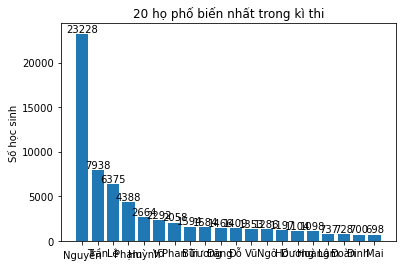

In [3]:
# Vẽ biểu đồ
# https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
import matplotlib.pyplot as plt
import numpy as np

num = 20 # Số họ được vẽ

x = np.arange(num)
y = np.arange(num)

fig, axis = plt.subplots()
plt.bar(x, name_count_sorted[0:num])

# label for column x
plt.xticks(x, name_sorted[0:num])

axis.set_ylabel('Số học sinh')

rects = axis.patches

# Make some labels.
# https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
labels = name_count_sorted[0:num]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(rect.get_x() + rect.get_width() / 2, height + 2, label, ha='center', va='bottom')

plt.title(str(num) + ' họ phố biến nhất trong kì thi')

plt.show()

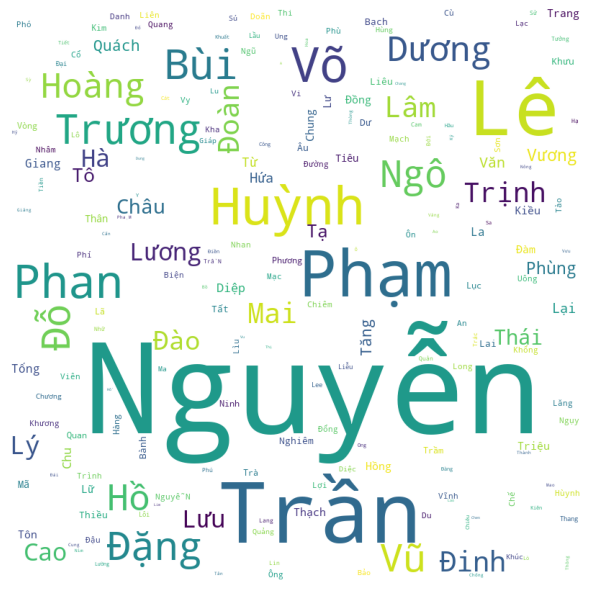

In [7]:
# Create a dictionary from the two lists using zip function
word_freq_dict = dict(zip(name, name_count))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()